In [187]:
# Importing Libraries 
import numpy as np 
import pandas as pd 

# Import dataset 
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t') 

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [188]:
# library to clean data 
import re 

# Natural Language Tool Kit 
import nltk 

nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
corpus = [] 

# 1000 (reviews) rows to clean 
for i in range(0, 1000): 
	
	# column : "Review", row ith 
	review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
	
	# convert all cases to lower cases 
	review = review.lower() 
	
	# split to array(default delimiter is " ") 
	review = review.split() 
	
	# creating PorterStemmer object to 
	# take main stem of each word 
	ps = PorterStemmer() 
	
	# loop for stemming each word 
	# in string array at ith row	 
	review = [ps.stem(word) for word in review 
				if not word in set(stopwords.words('english'))] 
				
	# rejoin all string array elements 
	# to create back into a string 
	review = ' '.join(review) 
	
	# append each string to create 
	# array of clean text 
	corpus.append(review) 

    
#corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fizas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review 
# is positive or negative 
y = dataset.iloc[:, 1].values 


In [191]:
# Splitting the dataset into 
# the Training set and Test set 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42) 


In [192]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model1 = RandomForestClassifier(n_estimators = 501, 
							criterion = 'entropy') 
							
model1.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
# Predicting the Test set results
#RANDOM FOREST
y_pred1 = model1.predict(X_test) 

y_pred1 


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [194]:
# Making the Confusion Matrix of RANDOM FOREST
from sklearn.metrics import confusion_matrix 

cm1 = confusion_matrix(y_test, y_pred1) 
cm1    

#    P   P
#A   tp fn
#A   fp tn


array([[150,  23],
       [ 63,  94]], dtype=int64)

In [195]:
#RANDOM FOREST ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       173
           1       0.80      0.60      0.69       157

    accuracy                           0.74       330
   macro avg       0.75      0.73      0.73       330
weighted avg       0.75      0.74      0.73       330



In [196]:
#NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB().fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

y_pred2

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [197]:
# Making the Confusion Matrix of NAIVE BAYES
from sklearn.metrics import confusion_matrix 

cm2 = confusion_matrix(y_test, y_pred2) 
cm2    


array([[129,  44],
       [ 36, 121]], dtype=int64)

In [198]:
#NAIVE BAYES ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       173
           1       0.73      0.77      0.75       157

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



In [199]:
#SVM
from sklearn.svm import LinearSVC

model3 = LinearSVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

y_pred3

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [200]:
# Making the Confusion Matrix of SVM
from sklearn.metrics import confusion_matrix 

cm3 = confusion_matrix(y_test, y_pred3) 
cm3    


array([[137,  36],
       [ 50, 107]], dtype=int64)

In [201]:
#SVM ACCURACY
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       173
           1       0.75      0.68      0.71       157

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



In [202]:
#LR
from sklearn.linear_model import LogisticRegression
model4= LogisticRegression()
model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

y_pred4

C:\Users\fizas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [203]:
#LR Confusion matrix
from sklearn.metrics import confusion_matrix 

cm4 = confusion_matrix(y_test, y_pred4) 
cm4    


array([[141,  32],
       [ 45, 112]], dtype=int64)

In [204]:
#LR Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       173
           1       0.78      0.71      0.74       157

    accuracy                           0.77       330
   macro avg       0.77      0.76      0.76       330
weighted avg       0.77      0.77      0.77       330



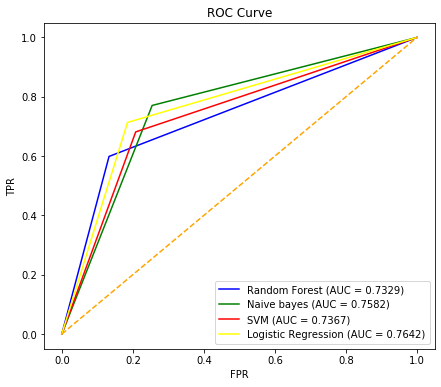

In [205]:
# ROC Curve


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



fpr1, tpr1, _ = roc_curve(y_test,  y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)

plt.figure(figsize=(7, 6))
plt.plot(fpr1, tpr1, color='blue',
label='Random Forest (AUC = %0.4f)' % auc1)
plt.legend(loc='lower right')

fpr2, tpr2, _ = roc_curve(y_test,  y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
plt.plot(fpr2, tpr2, color='green',
label='Naive bayes (AUC = %0.4f)' % auc2)
plt.legend(loc='lower right')

fpr3, tpr3, _ = roc_curve(y_test,  y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)
plt.plot(fpr3, tpr3, color='red',
label='SVM (AUC = %0.4f)' % auc3)
plt.legend(loc='lower right')

fpr4, tpr4, _ = roc_curve(y_test,  y_pred4)
auc4 = roc_auc_score(y_test, y_pred4)
plt.plot(fpr4, tpr4, color='yellow',
label='Logistic Regression (AUC = %0.4f)' % auc4)
plt.legend(loc='lower right')

plt.plot([0,1], [0,1], color='orange', linestyle='--')



plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()